In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [5]:
#Location of dataset file
file = "Dataset.csv"
data = pd.read_csv(file)
data.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [6]:
data = data.drop(columns=['Unnamed: 0', 'Unit1', 'Unit2'])
data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel', 'Patient_ID'],
      dtype='object')

<Axes: >

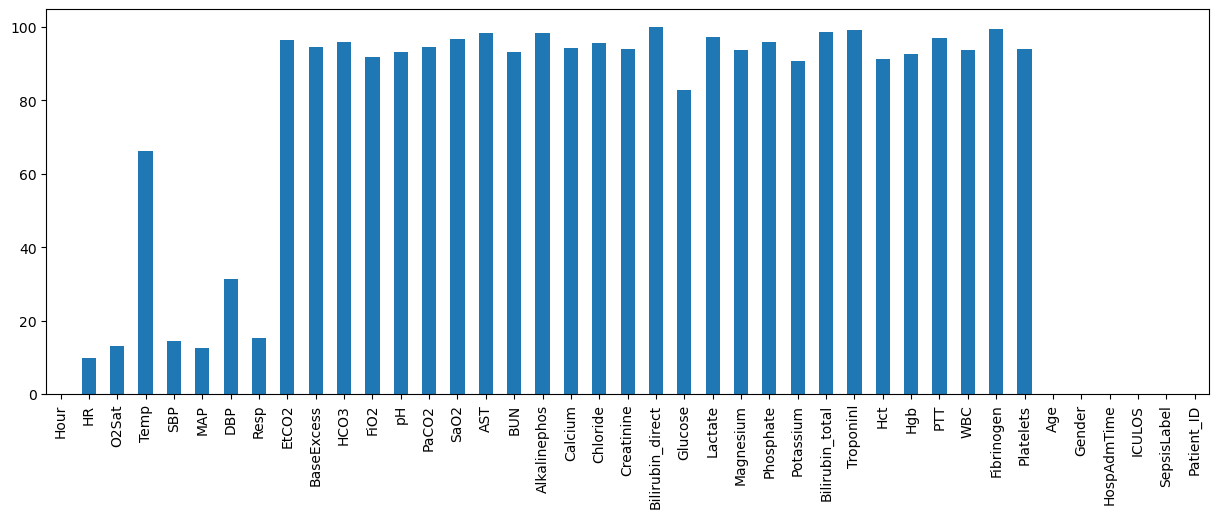

In [7]:
# pourcentage des valeurs manquantes pour chaque colonnes
round(100*(data.isnull().sum()/len(data.index)),2).plot.bar(figsize=(15,5))

In [20]:
# Supprimer les colonnes avec un pourcentage élevé de valeurs manquantes
threshold = 70  # Supprimer les colonnes avec plus de 70% de valeurs manquantes
df = data[data.columns[data.isnull().mean() * 100 < threshold]]
df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,68.54,0,-0.02,5,0,17072


In [22]:
df.shape

(1552210, 14)

In [21]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [24]:
# Trouver les patients avec sepsis à l'heure de l'admission
# Nous supposons que `HospAdmTime <= 0` indique une admission immédiate ou antérieure au premier enregistrement
sepsis_at_admission = df[(df['HospAdmTime'] <= 0) & (df['SepsisLabel'] == 1)]

# Obtenir les IDs uniques des patients ayant un sepsis à l'admission
patients_with_sepsis_at_admission = sepsis_at_admission['Patient_ID'].unique()

# Filtrer ces patients du DataFrame original
df_filtered = df[~df['Patient_ID'].isin(patients_with_sepsis_at_admission)]

# Afficher les informations sur le DataFrame filtré
print(df_filtered.head())
print(f"Nombre de lignes après le filtrage : {df_filtered.shape[0]}")

   Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp    Age  Gender  \
0     0   NaN    NaN   NaN    NaN   NaN   NaN   NaN  68.54       0   
1     1  65.0  100.0   NaN    NaN  72.0   NaN  16.5  68.54       0   
2     2  78.0  100.0   NaN    NaN  42.5   NaN   NaN  68.54       0   
3     3  73.0  100.0   NaN    NaN   NaN   NaN  17.0  68.54       0   
4     4  70.0  100.0   NaN  129.0  74.0  69.0  14.0  68.54       0   

   HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
0        -0.02       1            0       17072  
1        -0.02       2            0       17072  
2        -0.02       3            0       17072  
3        -0.02       4            0       17072  
4        -0.02       5            0       17072  
Nombre de lignes après le filtrage : 1379866


In [26]:
df_filtered.describe()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.379866e+06,1.238639e+06,1.192916e+06,464356.000000,1.177436e+06,1.201439e+06,936849.000000,1.163790e+06,1.379866e+06,1.379866e+06,1.379858e+06,1.379866e+06,1.379866e+06,1.379866e+06
mean,2.134602e+01,8.412694e+01,9.717988e+01,36.960457,1.236958e+02,8.245968e+01,63.979565,1.858764e+01,6.197790e+01,5.555242e-01,-5.307184e+01,2.282955e+01,2.174124e-05,6.042177e+04
std,1.963372e+01,1.711424e+01,2.926694e+00,0.749177,2.308556e+01,1.635788e+01,13.980683,4.972810e+00,1.641322e+01,4.969077e-01,1.526857e+02,1.976391e+01,4.662701e-03,5.025751e+04
min,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,1.400000e+01,0.000000e+00,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,54.000000,1.500000e+01,5.151000e+01,0.000000e+00,-4.527000e+01,1.000000e+01,0.000000e+00,1.020500e+04
50%,1.800000e+01,8.300000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,6.400000e+01,1.000000e+00,-6.220000e+00,2.000000e+01,0.000000e+00,1.001380e+05
75%,3.100000e+01,9.500000e+01,9.900000e+01,37.440000,1.380000e+02,9.200000e+01,72.000000,2.100000e+01,7.400000e+01,1.000000e+00,-4.000000e-02,3.200000e+01,0.000000e+00,1.100940e+05
max,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,1.000000e+02,1.000000e+00,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [30]:
# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_filtered.select_dtypes(include=[np.number])), columns=df_filtered.select_dtypes(include=[np.number]).columns)

# Ajouter les colonnes catégorielles non traitées (si elles existent)
df_imputed = pd.concat([df_imputed, df_filtered.select_dtypes(exclude=[np.number])], axis=1)


# Encodage des variables catégorielles
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_imputed.select_dtypes(include=['object', 'category']))

# Utiliser get_feature_names_out() pour obtenir les noms des caractéristiques
feature_names = encoder.get_feature_names_out()

# Fusionner les nouvelles caractéristiques encodées avec le reste des données numériques
df_final_imputed = pd.concat([
    df_imputed.select_dtypes(exclude=['object', 'category']),
    pd.DataFrame(encoded_features.toarray(), columns=feature_names)
], axis=1)

# Afficher les premières lignes pour vérifier
print(df_final_imputed.head())

   Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp    Age  Gender  \
0   0.0  83.0   98.0  37.0  121.0  80.0  62.0  18.0  68.54     0.0   
1   1.0  65.0  100.0  37.0  121.0  72.0  62.0  16.5  68.54     0.0   
2   2.0  78.0  100.0  37.0  121.0  42.5  62.0  18.0  68.54     0.0   
3   3.0  73.0  100.0  37.0  121.0  80.0  62.0  17.0  68.54     0.0   
4   4.0  70.0  100.0  37.0  129.0  74.0  69.0  14.0  68.54     0.0   

   HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
0        -0.02     1.0          0.0     17072.0  
1        -0.02     2.0          0.0     17072.0  
2        -0.02     3.0          0.0     17072.0  
3        -0.02     4.0          0.0     17072.0  
4        -0.02     5.0          0.0     17072.0  


In [31]:
df_final_imputed.describe()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06,1.379866e+06
mean,2.134602e+01,8.401160e+01,9.729099e+01,3.698669e+01,1.233003e+02,8.214162e+01,6.334401e+01,1.849562e+01,6.197790e+01,5.555242e-01,-5.307157e+01,2.282955e+01,2.174124e-05,6.042177e+04
std,1.963372e+01,1.621840e+01,2.735658e+00,4.350032e-01,2.134640e+01,1.528598e+01,1.155681e+01,4.571882e+00,1.641322e+01,4.969077e-01,1.526853e+02,1.976391e+01,4.662701e-03,5.025751e+04
min,0.000000e+00,2.000000e+01,2.000000e+01,2.090000e+01,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,1.400000e+01,0.000000e+00,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,7.300000e+01,9.600000e+01,3.700000e+01,1.090000e+02,7.233000e+01,5.800000e+01,1.600000e+01,5.151000e+01,0.000000e+00,-4.527000e+01,1.000000e+01,0.000000e+00,1.020500e+04
50%,1.800000e+01,8.300000e+01,9.800000e+01,3.700000e+01,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,6.400000e+01,1.000000e+00,-6.220000e+00,2.000000e+01,0.000000e+00,1.001380e+05
75%,3.100000e+01,9.300000e+01,9.900000e+01,3.700000e+01,1.350000e+02,9.000000e+01,6.700000e+01,2.000000e+01,7.400000e+01,1.000000e+00,-4.000000e-02,3.200000e+01,0.000000e+00,1.100940e+05
max,3.350000e+02,2.800000e+02,1.000000e+02,5.000000e+01,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,1.000000e+02,1.000000e+00,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [36]:
# data sans imputation
df_final = df_filtered
display(df_final.head())

# data après imputation
df_final_imputed

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,68.54,0,-0.02,5,0,17072


,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0.0,83.0,98.0,37.0,121.0,80.0,62.0,18.0,68.54,0.0,-0.02,1.0,0.0,17072.0
1,1.0,65.0,100.0,37.0,121.0,72.0,62.0,16.5,68.54,0.0,-0.02,2.0,0.0,17072.0
2,2.0,78.0,100.0,37.0,121.0,42.5,62.0,18.0,68.54,0.0,-0.02,3.0,0.0,17072.0
3,3.0,73.0,100.0,37.0,121.0,80.0,62.0,17.0,68.54,0.0,-0.02,4.0,0.0,17072.0
4,4.0,70.0,100.0,37.0,129.0,74.0,69.0,14.0,68.54,0.0,-0.02,5.0,0.0,17072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Assurez-vous que les données sont triées par Patient_ID et par heure
df_final.sort_values(by=['Patient_ID', 'Hour'], inplace=True)

# Fonction pour calculer les statistiques sur des fenêtres de temps
def calculate_window_features(data, window_size):
    # Calculer des statistiques roulantes pour chaque fenêtre
    features = data.rolling(window=window_size, min_periods=1).agg(['mean', 'median', 'min', 'max', 'std'])
    # Aplatir les colonnes multi-niveaux
    features.columns = ['_'.join(col).strip() for col in features.columns.values]
    # Ajouter des colonnes pour identifier la fenêtre et le Patient_ID
    features['Window'] = np.ceil(data['Hour'] / window_size) * window_size
    features['Patient_ID'] = data['Patient_ID']
    return features

# Appliquer la fonction aux fenêtres de 4h, 8h et 12h
windows = [4, 8, 12]
all_windows_features = pd.DataFrame()

for w in windows:
    window_features = calculate_window_features(df, w)
    all_windows_features = pd.concat([all_windows_features, window_features])

# Supprimer les doublons potentiels
all_windows_features.drop_duplicates(inplace=True)




C:\Users\AdminPC\AppData\Local\Temp\ipykernel_7652\1327022484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.sort_values(by=['Patient_ID', 'Hour'], inplace=True)


NameError: name 'diplay' is not defined

In [42]:
display(all_windows_features)

,Hour_mean,Hour_median,Hour_min,Hour_max,Hour_std,HR_mean,HR_median,HR_min,HR_max,HR_std,...,SepsisLabel_min,SepsisLabel_max,SepsisLabel_std,Patient_ID_mean,Patient_ID_median,Patient_ID_min,Patient_ID_max,Patient_ID_std,Window,Patient_ID
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,17072.0,17072.0,17072.0,17072.0,NaN,0.0,17072
1,0.5,0.5,0.0,1.0,0.707107,65.000000,65.00,65.0,65.0,NaN,...,0.0,0.0,0.0,17072.0,17072.0,17072.0,17072.0,0.0,4.0,17072
2,1.0,1.0,0.0,2.0,1.000000,71.500000,71.50,65.0,78.0,9.192388,...,0.0,0.0,0.0,17072.0,17072.0,17072.0,17072.0,0.0,4.0,17072
3,1.5,1.5,0.0,3.0,1.290994,72.000000,73.00,65.0,78.0,6.557439,...,0.0,0.0,0.0,17072.0,17072.0,17072.0,17072.0,0.0,4.0,17072
4,2.5,2.5,1.0,4.0,1.290994,71.500000,71.50,65.0,78.0,5.446712,...,0.0,0.0,0.0,17072.0,17072.0,17072.0,17072.0,0.0,4.0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,15.5,15.5,10.0,21.0,3.605551,77.125000,76.00,65.0,97.0,9.899782,...,0.0,0.0,0.0,113911.0,113911.0,113911.0,113911.0,0.0,24.0,113911
1552206,16.5,16.5,11.0,22.0,3.605551,77.291667,77.00,65.0,97.0,9.932633,...,0.0,0.0,0.0,113911.0,113911.0,113911.0,113911.0,0.0,24.0,113911
1552207,17.5,17.5,12.0,23.0,3.605551,79.041667,81.00,65.0,97.0,11.083276,...,0.0,0.0,0.0,113911.0,113911.0,113911.0,113911.0,0.0,24.0,113911
1552208,18.5,18.5,13.0,24.0,3.605551,81.708333,82.25,65.0,104.0,12.930686,...,0.0,0.0,0.0,113911.0,113911.0,113911.0,113911.0,0.0,24.0,113911


In [44]:
from sklearn.model_selection import train_test_split


# Exemple pour la fenêtre de 4 heures
data_4h = all_windows_features[all_windows_features['Window'] == 4]

X = data_4h.drop(['SepsisLabel', 'Patient_ID', 'Window'], axis=1)  # Supposer 'Target' est la colonne cible
y = data_4h['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['SepsisLabel'] not found in axis"